In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import geopandas as gpd
import geobr

In [2]:
sys.path.append('..')

In [3]:
df_p = pd.read_csv('../Data/analyzed/SIR_naive_p.csv')

In [4]:
map_br = geobr.read_municipality()

C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\denise.cammarota\AppData\Loc

C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [5]:
map_br['codigo'] = map_br['code_muni'].astype(str).str[:6].astype(int)

In [6]:
map_br = map_br.merge(df_p, how = 'left', left_on ='codigo', right_on ='ID_MN_RESI')

C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\denise.cammarota\AppData\Local\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWa

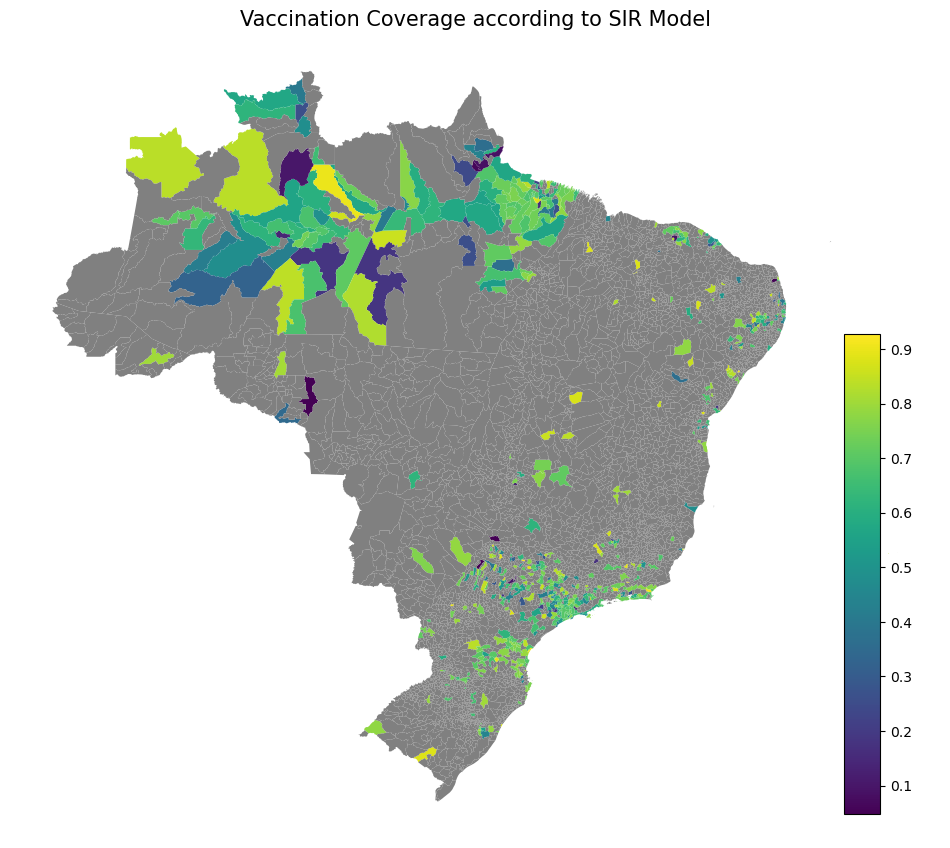

In [8]:
    map_br_aux = map_br.copy()
    fig, axs = plt.subplots(figsize = (12,12))
    missing_kwds = dict(color='grey', label='No Data')
    map_br_aux.plot(
        ax=axs, # Axis de destino do gráfico
        column="p", # Coluna com os valores usados para colorir o mapa
        missing_kwds=missing_kwds
    )
    cax = fig.add_axes(
        [
            0.82,    # posicao x (entre 0.0 e 1.0)
            0.18,    # posicao y (entre 0.0 e 1.0)
            0.03,    # largura x
            0.40,    # altura y
        ]
    )

    sm = plt.cm.ScalarMappable(
        cmap="viridis",                                       
        norm=plt.Normalize(
            vmin=map_br_aux["p"].min(),  
            vmax=map_br_aux["p"].max(),  
        ),
    )
    
    fig.colorbar(
    sm,
    cax=cax)
    
    axs.set_title(
    "Vaccination Coverage according to SIR Model",
    fontdict={"fontsize": 15},
    )
    axs.axis("off") 
    fig.savefig('../Figs/SIR_Naive_p.pdf')